# Usage: policy measures
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.13.3-theta-fu1.new.56.420.422.429.449.fix.438.441.450'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

196

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **17th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{2: ['Laos', 'Holy See', 'Solomon Islands', 'Timor-Leste'],
 3: ['Saint Kitts and Nevis'],
 4: ['Brunei', 'Fiji', 'Tanzania', 'Dominica'],
 5: ['Saint Lucia', 'Equatorial Guinea', 'Grenada'],
 6: ['Mauritius', 'Antigua and Barbuda', 'Cambodia'],
 7: ['Saint Vincent and the Grenadines'],
 8: ['Kyrgyzstan', 'Madagascar', 'Barbados', 'Northern Mariana Islands',
     'Bahamas', 'Seychelles', 'Trinidad and Tobago'],
 9: ['Liechtenstein', 'Bolivia', 'Australia', 'Oman', 'Ghana', 'Vietnam',
     'Gambia', 'Jamaica', 'Sao Tome and Principe', 'Monaco', 'Uzbekistan',
     'Malawi', 'Philippines'],
 10: ['Bhutan', 'Eritrea', 'Benin', 'Maldives', 'Guyana', 'South Africa',
      'Singapore', 'Burundi', 'Bermuda', 'Lesotho', 'Papua New Guinea',
      'Angola', 'Guam', 'Djibouti', 'Cape Verde', 'Chile', 'Libya', 'Venezuela',
      'El Salvador', 'Zambia', 'Iceland', 'Republic of the Congo', 'Namibia',
      'Senegal', 'Ethiopia', 'Suriname', 'Kazakhstan', 'Guatemala', 'Zimbabwe',
      'Botswana', 'K

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=17)
# The number of countries
len(analyser.countries)

5

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{17: ['Finland', 'Norway', 'United Kingdom'], 18: ['Germany', 'Portugal']}


In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country  Phase                                        
Germany  0th    Past  19Jan2020  23Mar2020    82905782
         1st    Past  24Mar2020  04Apr2020    82905782
         2nd    Past  05Apr2020  21Apr2020    82905782
         3rd    Past  22Apr2020  17Jun2020    82905782
         4th    Past  18Jun2020  15Aug2020    82905782
         5th    Past  16Aug2020  16Sep2020    82905782
         6th    Past  17Sep2020  08Oct2020    82905782
         7th    Past  09Oct2020  20Oct2020    82905782
         8th    Past  21Oct2020  27Oct2020    82905782
         9th    Past  28Oct2020  03Nov2020    82905782
         10th   Past  04Nov2020  10Nov2020    82905782
         11th   Past  11Nov2020  17Nov2020    82905782
         12th   Past  18Nov2020  24Nov2020    82905782
         13th   Past  25Nov2020  01Dec2020    82905782
         14th   Past  02Dec2020  08Dec2020    82905782
         15th   Past  09Dec2020  14Dec2020    82905782
         16th   Past  15Dec2020  20Dec2020    82905782
         17th   Past  21Dec2020  28Dec2020    82905782
Portugal 0th    Past  14Mar2020  03Apr2020    10283822
         1st    Past  04Apr2020  22Apr2020    10283822
         2nd    Past  23Apr2020  01Jun2020    10283822
         3rd    Past  02Jun2020  02Jul2020    10283822
         4th    Past  03Jul2020  11Aug2020    10283822
         5th    Past  12Aug2020  11Sep2020    10283822
         6th    Past  12Sep2020  30Sep2020    10283822
         7th    Past  01Oct2020  13Oct2020    10283822
         8th    Past  14Oct2020  21Oct2020    10283822
         9th    Past  22Oct2020  28Oct2020    10283822
         10th   Past  29Oct2020  04Nov2020    10283822
         11th   Past  05Nov2020  14Nov2020    10283822
         12th   Past  15Nov2020  25Nov2020    10283822
         13th   Past  26Nov2020  02Dec2020    10283822
         14th   Past  03Dec2020  09Dec2020    10283822
         15th   Past  10Dec2020  15Dec2020    10283822
         16th   Past  16Dec2020  21Dec2020    10283822
         17th   Past  22Dec2020  28Dec2020    10283822

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF, timeout=10)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	NOR,  8th phase (21Oct2020 - 28Oct2020): finished  233 trials in 0 min 10 sec

	PRT, 13th phase (26Nov2020 - 02Dec2020): finished  225 trials in 0 min 10 sec

	GBR,  5th phase (17Sep2020 - 02Oct2020): finished  228 trials in 0 min 10 sec

	PRT,  4th phase (03Jul2020 - 11Aug2020): finished  212 trials in 0 min 10 sec

	NOR,  4th phase (06Aug2020 - 02Sep2020): finished  229 trials in 0 min 10 sec

	FIN,  0th phase (17Mar2020 - 04Apr2020): finished  219 trials in 0 min 10 sec

	DEU,  0th phase (19Jan2020 - 23Mar2020): finished  212 trials in 0 min 10 sec

	PRT,  9th phase (22Oct2020 - 28Oct2020): finished  234 trials in 0 min 10 sec

	FIN, 16th phase (21Dec2020 - 28Dec2020): finished  219 trials in 0 min 10 sec

	FIN, 14th phase (09Dec2020 - 14Dec2020): finished  209 trials in 0 min 10 sec

	PRT,  6th phase (12Sep2020 - 30Sep2020): finished  207 trials in 0 min 10 sec

	GBR,  6th phase (03Oct2020 - 12Oct2020): finished  214 trials in 0 min 10 sec

	DEU, 11th phase (11Nov2020 - 17Nov2020): finished  229 trials in 0 min 10 sec

	NOR,  7th phase (06Oct2020 - 20Oct2020): finished  235 trials in 0 min 10 sec

	DEU,  4th phase (18Jun2020 - 15Aug2020): finished  209 trials in 0 min 10 sec

	GBR, 15th phase (11Dec2020 - 16Dec2020): finished  230 trials in 0 min 10 sec

	DEU,  6th phase (17Sep2020 - 08Oct2020): finished  231 trials in 0 min 10 sec

	DEU,  3rd phase (22Apr2020 - 17Jun2020): finished  203 trials in 0 min 10 sec

	DEU,  9th phase (28Oct2020 - 03Nov2020): finished  233 trials in 0 min 10 sec

	DEU,  1st phase (24Mar2020 - 04Apr2020): finished  219 trials in 0 min 10 sec

	PRT, 10th phase (29Oct2020 - 04Nov2020): finished  214 trials in 0 min 10 sec

	PRT,  5th phase (12Aug2020 - 11Sep2020): finished  218 trials in 0 min 10 sec

	FIN, 13th phase (02Dec2020 - 08Dec2020): finished  224 trials in 0 min 10 sec

	PRT,  7th phase (01Oct2020 - 13Oct2020): finished  233 trials in 0 min 10 sec

	FIN,  5th phase (21Aug2020 - 22Sep2020): finished  222 trials in 0 min 10 sec

	GBR,  1st phase (10Apr2020 - 30Apr2020): finished  212 trials in 0 min 10 sec

	NOR,  2nd phase (06Apr2020 - 02May2020): finished  217 trials in 0 min 10 sec

	PRT, 12th phase (15Nov2020 - 25Nov2020): finished  233 trials in 0 min 10 sec

	FIN,  9th phase (29Oct2020 - 08Nov2020): finished  218 trials in 0 min 10 sec

	NOR, 12th phase (23Nov2020 - 29Nov2020): finished  241 trials in 0 min 10 sec

	DEU, 10th phase (04Nov2020 - 10Nov2020): finished  228 trials in 0 min 10 sec

	FIN,  7th phase (08Oct2020 - 18Oct2020): finished  217 trials in 0 min 10 sec

	FIN,  1st phase (05Apr2020 - 19Apr2020): finished  229 trials in 0 min 10 sec

	DEU,  8th phase (21Oct2020 - 27Oct2020): finished  229 trials in 0 min 10 sec

	DEU, 12th phase (18Nov2020 - 24Nov2020): finished  231 trials in 0 min 10 sec

	PRT, 14th phase (03Dec2020 - 09Dec2020): finished  228 trials in 0 min 10 sec

	NOR,  9th phase (29Oct2020 - 03Nov2020): finished  232 trials in 0 min 10 sec

	FIN, 11th phase (19Nov2020 - 25Nov2020): finished  224 trials in 0 min 10 sec

	FIN,  6th phase (23Sep2020 - 07Oct2020): finished  229 trials in 0 min 10 sec

	NOR, 14th phase (08Dec2020 - 14Dec2020): finished  224 trials in 0 min 10 sec

	DEU,  7th phase (09Oct2020 - 20Oct2020): finished  227 trials in 0 min 10 sec

	FIN,  4th phase (28May2020 - 20Aug2020): finished  214 trials in 0 min 10 sec

	PRT, 15th phase (10Dec2020 - 15Dec2020): finished  239 trials in 0 min 10 sec

	NOR, 10th phase (04Nov2020 - 09Nov2020): finished  221 trials in 0 min 10 sec

	GBR, 14th phase (03Dec2020 - 10Dec2020): finished  232 trials in 0 min 10 sec

	PRT,  3rd phase (02Jun2020 - 02Jul2020): finished  223 trials in 0 min 10 sec

	GBR,  0th phase (23Feb2020 - 09Apr2020): finished  226 trials in 0 min 10 sec

	DEU,  2nd phase (05Apr2020 - 21Apr2020): finished  226 trials in 0 min 10 sec

	DEU, 13th phase (25Nov2020 - 01Dec2020): finished  230 trials in 0 min 10 sec

	PRT,  0th phase (14Mar2020 - 03Apr2020): finished  216 trials in 0 min 10 sec

	PRT, 17th phase (22Dec2020 - 28Dec2020): finished  225 trials in 0 min 10 sec

	NOR, 11th phase (10Nov2020 - 22Nov2020): finished  215 trials in 0 min 10 sec

	FIN, 10th phase (09Nov2020 - 18Nov2020): finished  174 trials in 0 min 10 sec

	GBR, 13th phase (25Nov2020 - 02Dec2020): finished  180 trials in 0 min 10 sec

	PRT,  2nd phase (23Apr2020 - 01Jun2020): finished  171 trials in 0 min 10 sec

	NOR,  5th phase (03Sep2020 - 19Sep2020): finished  182 trials in 0 min 10 sec

	NOR,  6th phase (20Sep2020 - 05Oct2020): finished  226 trials in 0 min 10 sec

	FIN,  8th phase (19Oct2020 - 28Oct2020): finished  217 trials in 0 min 10 sec

	GBR,  2nd phase (01May2020 - 27May2020): finished  214 trials in 0 min 10 sec

	PRT,  8th phase (14Oct2020 - 21Oct2020): finished  206 trials in 0 min 10 sec

	NOR,  1st phase (26Mar2020 - 05Apr2020): finished  234 trials in 0 min 10 sec

	GBR,  7th phase (13Oct2020 - 20Oct2020): finished  239 trials in 0 min 10 sec

	FIN, 12th phase (26Nov2020 - 01Dec2020): finished  246 trials in 0 min 10 sec

	GBR,  3rd phase (28May2020 - 07Aug2020): finished  222 trials in 0 min 10 sec

	DEU,  5th phase (16Aug2020 - 16Sep2020): finished  284 trials in 0 min 10 sec

	NOR,  0th phase (15Mar2020 - 25Mar2020): finished  296 trials in 0 min 10 sec

	PRT, 11th phase (05Nov2020 - 14Nov2020): finished  307 trials in 0 min 10 sec

	PRT,  1st phase (04Apr2020 - 22Apr2020): finished  222 trials in 0 min 10 sec

	FIN,  3rd phase (05May2020 - 27May2020): finished  247 trials in 0 min 10 sec

	FIN, 15th phase (15Dec2020 - 20Dec2020): finished  268 trials in 0 min 10 sec

	NOR, 13th phase (30Nov2020 - 07Dec2020): finished  349 trials in 0 min 10 sec

	GBR,  4th phase (08Aug2020 - 16Sep2020): finished  326 trials in 0 min 10 sec

	GBR, 16th phase (17Dec2020 - 28Dec2020): finished  349 trials in 0 min 10 sec

	NOR,  3rd phase (03May2020 - 05Aug2020): finished  331 trials in 0 min 10 sec

	PRT, 16th phase (16Dec2020 - 21Dec2020): finished  338 trials in 0 min 10 sec

	FIN,  2nd phase (20Apr2020 - 04May2020): finished  332 trials in 0 min 10 sec

Completed optimization. Total: 3 min 40 sec


In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE      Rt  \
Country  Phase                                                          
Germany  0th    Past  19Jan2020  23Mar2020    82905782  SIR-F   10.83   
         1st    Past  24Mar2020  04Apr2020    82905782  SIR-F    4.98   
         2nd    Past  05Apr2020  21Apr2020    82905782  SIR-F    0.55   
         3rd    Past  22Apr2020  17Jun2020    82905782  SIR-F    0.54   
         4th    Past  18Jun2020  15Aug2020    82905782  SIR-F    1.15   
         5th    Past  16Aug2020  16Sep2020    82905782  SIR-F    1.31   
         6th    Past  17Sep2020  08Oct2020    82905782  SIR-F    1.31   
         7th    Past  09Oct2020  20Oct2020    82905782  SIR-F    3.13   
         8th    Past  21Oct2020  27Oct2020    82905782  SIR-F    3.03   
         9th    Past  28Oct2020  03Nov2020    82905782  SIR-F    2.25   
         10th   Past  04Nov2020  10Nov2020    82905782  SIR-F    1.44   
         11th   Past  11Nov2020  17Nov2020    82905782  SIR-F    1.07   
         12th   Past  18Nov2020  24Nov2020    82905782  SIR-F    0.97   
         13th   Past  25Nov2020  01Dec2020    82905782  SIR-F    0.91   
         14th   Past  02Dec2020  08Dec2020    82905782      -       -   
         15th   Past  09Dec2020  14Dec2020    82905782      -       -   
         16th   Past  15Dec2020  20Dec2020    82905782      -       -   
         17th   Past  21Dec2020  28Dec2020    82905782      -       -   
Portugal 0th    Past  14Mar2020  03Apr2020    10283822  SIR-F  119.98   
         1st    Past  04Apr2020  22Apr2020    10283822  SIR-F   10.24   
         2nd    Past  23Apr2020  01Jun2020    10283822  SIR-F    1.17   
         3rd    Past  02Jun2020  02Jul2020    10283822  SIR-F    1.23   
         4th    Past  03Jul2020  11Aug2020    10283822  SIR-F    0.77   
         5th    Past  12Aug2020  11Sep2020    10283822  SIR-F    1.74   
         6th    Past  12Sep2020  30Sep2020    10283822  SIR-F    2.18   
         7th    Past  01Oct2020  13Oct2020    10283822  SIR-F    2.34   
         8th    Past  14Oct2020  21Oct2020    10283822  SIR-F       2   
         9th    Past  22Oct2020  28Oct2020    10283822  SIR-F    1.89   
         10th   Past  29Oct2020  04Nov2020    10283822  SIR-F    1.86   
         11th   Past  05Nov2020  14Nov2020    10283822  SIR-F    1.69   
         12th   Past  15Nov2020  25Nov2020    10283822  SIR-F    0.95   
         13th   Past  26Nov2020  02Dec2020    10283822  SIR-F     0.8   
         14th   Past  03Dec2020  09Dec2020    10283822  SIR-F    1.06   
         15th   Past  10Dec2020  15Dec2020    10283822  SIR-F    0.93   
         16th   Past  16Dec2020  21Dec2020    10283822  SIR-F    1.25   
         17th   Past  22Dec2020  28Dec2020    10283822  SIR-F    1.35   

                      theta        kappa         rho        sigma  tau  \
Country  Phase                                                           
Germany  0th       0.217991    0.0018603   0.0376955  0.000861841  360   
         1st      0.0352431  0.000559985   0.0227786   0.00385104  360   
         2nd        0.03889  0.000481933   0.0120246    0.0206376  360   
         3rd      0.0298719  6.74042e-05   0.0128801     0.023009  360   
         4th     0.00379861  1.85307e-06   0.0162722    0.0141322  360   
         5th     0.00156721  0.000191478   0.0163251    0.0122317  360   
         6th     0.00159616  1.85307e-06   0.0182405    0.0138521  360   
         7th    0.000676492  6.74045e-05   0.0257733   0.00815652  360   
         8th     0.00261679  0.000301315   0.0272932   0.00868855  360   
         9th    0.000120584   0.00022902   0.0181477   0.00781793  360   
         10th   0.000182781  0.000228665   0.0176787    0.0120625  360   
         11th    0.00533793  0.000180071   0.0173738    0.0159985  360   
         12th    0.00547357   9.3087e-05   0.0170559     0.017396  360   
         13th     0.0159733  0.000287581   0.0146569    0.0156222  360   
         14th             -            -           -     

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-03-17,Finland,0.000805788,0.000150044,0.0239823,0.00206762,0.001,1666,10,120,...,2,4,0,1,1,4,2,1,1,57.41
1,2020-03-18,Finland,0.000805788,0.000150044,0.0239823,0.00206762,0.001,1666,10,120,...,2,4,0,1,1,4,2,1,1,64.81
2,2020-03-19,Finland,0.000805788,0.000150044,0.0239823,0.00206762,0.001,1666,10,120,...,2,4,0,1,1,4,2,1,1,64.81
3,2020-03-20,Finland,0.000805788,0.000150044,0.0239823,0.00206762,0.001,1666,10,120,...,2,4,0,1,1,4,2,1,1,64.81
4,2020-03-21,Finland,0.000805788,0.000150044,0.0239823,0.00206762,0.001,1666,10,120,...,2,4,0,1,1,4,2,1,1,64.81


### $Rt$: Reprodcution number $\mathrm{[-]}$

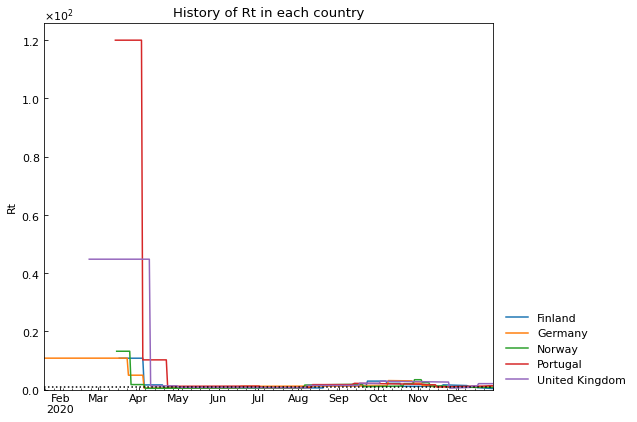

Country,Finland,Germany,Norway,Portugal,United Kingdom
Date,,,,,
2020-12-24,0.39,0.91,0.8,1.35,2.08
2020-12-25,0.39,0.91,0.8,1.35,2.08
2020-12-26,0.39,0.91,0.8,1.35,2.08
2020-12-27,0.39,0.91,0.8,1.35,2.08
2020-12-28,0.39,0.91,0.8,1.35,2.08


In [14]:
analyser.history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

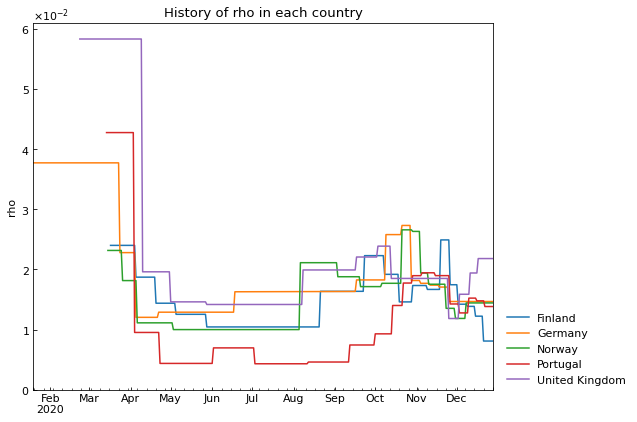

Country,Finland,Germany,Norway,Portugal,United Kingdom
Date,,,,,
2020-12-24,0.008086,0.014657,0.014418,0.013821,0.021792
2020-12-25,0.008086,0.014657,0.014418,0.013821,0.021792
2020-12-26,0.008086,0.014657,0.014418,0.013821,0.021792
2020-12-27,0.008086,0.014657,0.014418,0.013821,0.021792
2020-12-28,0.008086,0.014657,0.014418,0.013821,0.021792


In [15]:
analyser.history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

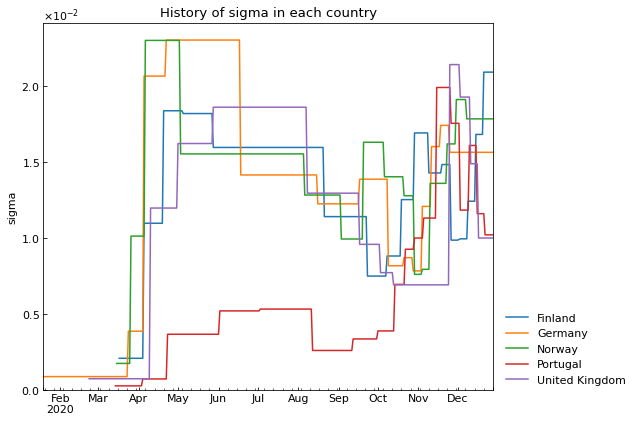

Country,Finland,Germany,Norway,Portugal,United Kingdom
Date,,,,,
2020-12-24,0.020898,0.015622,0.017822,0.010192,0.009981
2020-12-25,0.020898,0.015622,0.017822,0.010192,0.009981
2020-12-26,0.020898,0.015622,0.017822,0.010192,0.009981
2020-12-27,0.020898,0.015622,0.017822,0.010192,0.009981
2020-12-28,0.020898,0.015622,0.017822,0.010192,0.009981


In [16]:
analyser.history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

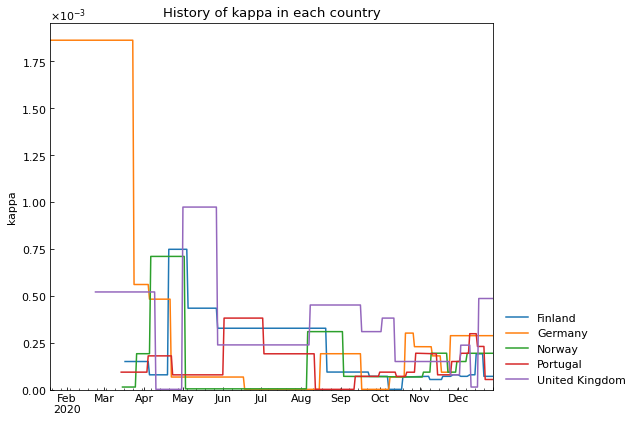

Country,Finland,Germany,Norway,Portugal,United Kingdom
Date,,,,,
2020-12-24,0.000071,0.000288,0.000194,0.000054,0.000485
2020-12-25,0.000071,0.000288,0.000194,0.000054,0.000485
2020-12-26,0.000071,0.000288,0.000194,0.000054,0.000485
2020-12-27,0.000071,0.000288,0.000194,0.000054,0.000485
2020-12-28,0.000071,0.000288,0.000194,0.000054,0.000485


In [17]:
analyser.history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

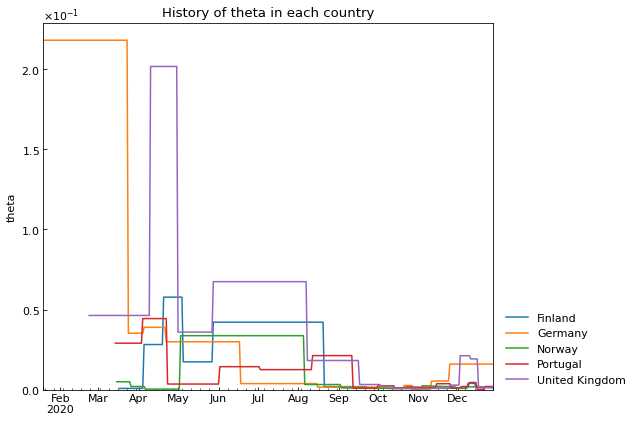

Country,Finland,Germany,Norway,Portugal,United Kingdom
Date,,,,,
2020-12-24,0.00119,0.015973,0.001759,0.002021,0.001442
2020-12-25,0.00119,0.015973,0.001759,0.002021,0.001442
2020-12-26,0.00119,0.015973,0.001759,0.002021,0.001442
2020-12-27,0.00119,0.015973,0.001759,0.002021,0.001442
2020-12-28,0.00119,0.015973,0.001759,0.002021,0.001442


In [18]:
analyser.history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16131 entries, 0 to 16186
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 16131 non-null  datetime64[ns]
 1   Country                              16131 non-null  object        
 2   Rt                                   16131 non-null  float64       
 3   theta                                16131 non-null  float64       
 4   kappa                                16131 non-null  float64       
 5   rho                                  16131 non-null  float64       
 6   sigma                                16131 non-null  float64       
 7   School_closing                       16131 non-null  int64         
 8   Workplace_closing                    16131 non-null  int64         
 9   Cancel_events                        16131 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,0.114183,0.155069,0.751339,-0.510597,-0.088899,-0.154705,-0.408855,-0.419064,-0.084299,-0.086156,-0.245021,-0.327862,-0.083797,-0.387466,-0.179383,-0.261969
theta,0.114183,1.000000,0.693929,0.357546,-0.252797,-0.010757,-0.414935,-0.522837,-0.562929,-0.139279,-0.182543,-0.199962,-0.566925,-0.563935,-0.667009,-0.272404,-0.434855
kappa,0.155069,0.693929,1.000000,0.468496,-0.409579,-0.232754,-0.569714,-0.613439,-0.664975,-0.185758,-0.357223,-0.315017,-0.506103,-0.634701,-0.658311,-0.236973,-0.556183
rho,0.751339,0.357546,0.468496,1.000000,-0.571861,-0.329686,-0.443657,-0.625855,-0.633608,-0.242313,-0.310388,-0.307850,-0.587166,-0.296003,-0.605377,-0.175069,-0.535136
sigma,-0.510597,-0.252797,-0.409579,-0.571861,1.000000,0.387822,0.361344,0.480381,0.555880,0.005258,0.086423,0.347163,0.315102,0.314776,0.324148,0.252903,0.410491
School_closing,-0.088899,-0.010757,-0.232754,-0.329686,0.387822,1.000000,0.644647,0.518628,0.529403,0.388351,0.480661,0.570041,0.038837,0.334182,-0.009159,-0.104762,0.688634
Workplace_closing,-0.154705,-0.414935,-0.569714,-0.443657,0.361344,0.644647,1.000000,0.819589,0.816223,0.516638,0.716641,0.648126,0.179278,0.521954,0.351991,-0.147880,0.882059
Cancel_events,-0.408855,-0.522837,-0.613439,-0.625855,0.480381,0.518628,0.819589,1.000000,0.881279,0.428416,0.619950,0.610800,0.471588,0.611317,0.559296,0.100353,0.883074
Gatherings_restrictions,-0.419064,-0.562929,-0.664975,-0.633608,0.555880,0.529403,0.816223,0.881279,1.000000,0.395582,0.534411,0.651113,0.431751,0.540350,0.544885,0.146132,0.850520
Transport_closing,-0.084299,-0.139279,-0.185758,-0.242313,0.005258,0.388351,0.516638,0.428416,0.395582,1.000000,0.485254,0.582325,-0.187139,0.245806,0.010647,-0.235035,0.577509


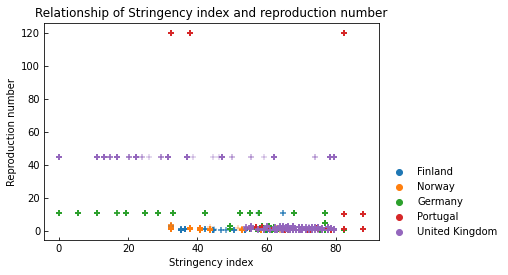

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()